# <center>**Working with Dates and Times in Python⌚**</center>

In [1]:
!git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git -q

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url_onebike = "/content/CAREER-TRACK-Data-Scientist-with-Python/18_Working with Dates and Times in Python/_dataset/capital-onebike.csv"
url_hurricane = "/content/CAREER-TRACK-Data-Scientist-with-Python/18_Working with Dates and Times in Python/_dataset/florida_hurricane_dates.pkl"

# **1️⃣Dates and Calendars**

## **Dates in Python**

### Which day of the week?

In [4]:
# Import date from datetime
from datetime import date

# Create a date object
hurricane_andrew = date(1992, 8, 24)

# Which day of the week is the date
print(hurricane_andrew.weekday())

0


It depends where you are from! In the **United States**, **Canada**, and **Japan**, Sunday is often considered the first day of the week. Everywhere else, it usually begins on Monday.

### How many hurricanes come early?

In [5]:
import pandas as pd

florida_hurricane_dates = pd.read_pickle(url_hurricane)

In [6]:
# Counter for how many before June 1
early_hurricanes = 0

# We loop over the dates
for hurricane in florida_hurricane_dates:
    # Check if the month is before June (month number 6)
    if hurricane.month < 6:
        early_hurricanes = early_hurricanes + 1

print(early_hurricanes)

10


## **Math with dates**

### Subtracting dates

In [7]:
# Import date
from datetime import date

# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)

218


### Counting events per calendar month

In [8]:
# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0,
                         7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Loop over all hurricanes
for hurricane in florida_hurricane_dates:
    # Pull out the month
    month = hurricane.month
    # Increment the count in your dictionary by one
    hurricanes_each_month[month] += 1
    
print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


### Putting a list of dates in order

In [9]:
import random

random.seed(0)

random.shuffle(florida_hurricane_dates)

dates_scrambled = florida_hurricane_dates.copy()

In [10]:
# Print the first and last scrambled dates
print(dates_scrambled[0])
print(dates_scrambled[-1])

# Put the dates in order
dates_ordered = sorted(dates_scrambled)

# Print the first and last ordered dates
print(dates_ordered[0])
print(dates_ordered[-1])

1969-10-02
1964-10-05
1950-08-31
2017-10-29


## **Turning dates into strings**

### Printing dates in a friendly format

In [11]:
# Assign the earliest date to first_date
first_date = min(florida_hurricane_dates)

# Convert to ISO and US formats
iso = 'Our earliest hurricane date: ' + first_date.isoformat()
us = 'Our earliest hurricane date: ' + first_date.strftime('%m/%d/%Y')

print('ISO: '+ iso)
print('US: '+ us)

ISO: Our earliest hurricane date: 1950-08-31
US: Our earliest hurricane date: 08/31/1950


### Representing dates in different ways

In [12]:
# Create a date object
andrew = date(1992, 8, 26)

# Print the date in the format 'YYYY-MM'
print(andrew.strftime('%Y-%m'))

# Print the date in the format 'MONTH (YYYY)'
print(andrew.strftime('%B (%Y)'))

# Print the date in the format 'YYYY-DDD'
print(andrew.strftime('%Y-%3j'))

1992-08
August (1992)
1992-239


# **2️⃣Combining Dates and Times**

## **Dates and times**


### Creating datetimes by hand

In [13]:
# Import datetime
from datetime import datetime

# Create a datetime object
dt = datetime(2017, 10, 1, 15, 26, 26)

# Print the results in ISO 8601 format
print(dt.isoformat())

2017-10-01T15:26:26


In [14]:
# Replace the year with 1917
dt_old = dt.replace(year=1917)

# Print the results in ISO 8601 format
print(dt_old)

1917-10-01 15:26:26


### Counting events before and after noon


In [15]:
import pandas as pd

df = pd.read_csv(url_onebike, header=0)
df['Start date'] = pd.to_datetime(df['Start date'])
df['End date'] = pd.to_datetime(df['End date'])

onebike_datetimes = []

for index, row in df.iterrows():
    onebike_datetimes.append({'start':row['Start date'], 'end':row['End date']})

In [16]:
# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}

# Loop over all trips
for trip in onebike_datetimes:
    if trip['start'].hour < 12:
        # Increment the counter for before noon
        trip_counts['AM'] += 1
    else:
        # Increment the counter for after noon
        trip_counts['PM'] += 1
        
print(trip_counts)

{'AM': 94, 'PM': 196}


## **Printing and parsing datetimes**


### Turning strings into datetimes

In [17]:
# Starting string, in YYYY-MM-DD HH:MM:SS format
s = '2017-02-03 00:00:01'

# Write a format string to parse s
fmt = '%Y-%m-%d %H:%M:%S'

# Create a datetime object d
d = datetime.strptime(s, fmt)

# Print d
print(d)

2017-02-03 00:00:01


### Parsing pairs of strings as datetimes


In [18]:
df = pd.read_csv(url_onebike, header=0)
df.head()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


In [19]:
onebike_datetimes_strings = df[['Start date', 'End date']]
onebike_datetimes_strings.head()

,Start date,End date
0,2017-10-01 15:23:25,2017-10-01 15:26:26
1,2017-10-01 15:42:57,2017-10-01 17:49:59
2,2017-10-02 06:37:10,2017-10-02 06:42:53
3,2017-10-02 08:56:45,2017-10-02 09:18:03
4,2017-10-02 18:23:48,2017-10-02 18:45:05


In [20]:
# Write down the format string
fmt = '%Y-%m-%d %H:%M:%S'

# Initialize
onebike_datetimes = []

# Loop over all trips
for i, (start, end) in onebike_datetimes_strings.iterrows():
    trip = {'start': datetime.strptime(start, fmt),
            'end': datetime.strptime(end, fmt)}
    # Append the trip
    onebike_datetimes.append(trip)

### Recreating ISO format with strftime()

In [21]:
# Pull out the start of the first trip
first_start = onebike_datetimes[0]['start']

# Format to feed to strftime()
#2017-10-01T15:26:26
fmt = '%Y-%m-%dT%H:%M:%S'

# Print out date with .isoformat(), the with .strftime() to compare
print(first_start.isoformat())
print(first_start.strftime(fmt))

2017-10-01T15:23:25
2017-10-01T15:23:25


### Unix timestamps

In [22]:
# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
    dts.append(datetime.fromtimestamp(ts))
    
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 20, 19, 13), datetime.datetime(2017, 12, 30, 20, 9, 3)]


## **Working with durations**


### Turning pairs of datetimes into durations

In [23]:
# Initialize a list for all the trip durations
onebike_durations = []

for trip in onebike_datetimes:
    # Create a timedelta object corresponding to the length of the trip
    trip_duration = trip['end'] - trip['start']
    
    # Get the total elapsed seconds in trip_duration
    trip_length_seconds = trip_duration.total_seconds()
    
    # Append the results to our list
    onebike_durations.append(trip_length_seconds)

### Average trip time

In [24]:
# What was the total duration of all trips
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips
number_of_trips = len(onebike_durations)

# Divide the total duration by the number of trips
print(total_elapsed_time / number_of_trips)

1178.9310344827586


### The long and the short of why time is hard

In [25]:
# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print("The shortest trip was " + str(shortest_trip) + " seconds")
print("The longest trip was " + str(longest_trip) + " seconds")

The shortest trip was -3346.0 seconds
The longest trip was 76913.0 seconds


# **3️⃣Time Zones and Daylight Saving**

## **UTC offsets**

### Creating timezone aware datetimes

In [26]:
# Import datetime, timezone
from datetime import datetime, timezone, timedelta

# October 1, 2017 at 15:26:26, UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=timezone.utc)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+00:00


In [27]:
# Create a timezone for Pacific Standard Time, or UTC-8
pst = timezone(timedelta(hours=-8))

# October 1, 2017 at 15:26:26, UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26-08:00


In [28]:
# Create a timezone for Australian Eastern Daylight Time, or UTC+11
edt = timezone(timedelta(hours=11))

# October 1, 2017 at 15:26:26, UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=edt)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+11:00


### Setting timezones


#### Preprocess

In [29]:
import pandas as pd

In [30]:
df = pd.read_csv(url_onebike, header=0)

onebike_datetimes_strings = df[['Start date', 'End date']]

# Write down the format string
fmt = '%Y-%m-%d %H:%M:%S'

# Initialize
onebike_datetimes = []
for i, (start, end) in onebike_datetimes_strings.iterrows():
    trip = {'start': datetime.strptime(start, fmt),
            'end': datetime.strptime(end, fmt)}
    
    onebike_datetimes.append(trip)

In [31]:
# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in onebike_datetimes[:10]:
    # Update trip['start'] and trip['end']
    trip['start'] = trip['start'].replace(tzinfo=edt)
    trip['end'] = trip['end'].replace(tzinfo=edt)

### What time did the bike leave in UTC?

In [32]:
# Loop over the trips
for trip in onebike_datetimes[:10]:
  # Pull out the start
  dt = trip['start']
  # Move dt to be in UTC
  dt = dt.astimezone(timezone.utc)
  
  # Print the start time in UTC
  print('Original:', trip['start'], '| UTC:', dt.isoformat())

Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00
Original: 2017-10-02 08:56:45-04:00 | UTC: 2017-10-02T12:56:45+00:00
Original: 2017-10-02 18:23:48-04:00 | UTC: 2017-10-02T22:23:48+00:00
Original: 2017-10-02 18:48:08-04:00 | UTC: 2017-10-02T22:48:08+00:00
Original: 2017-10-02 19:18:10-04:00 | UTC: 2017-10-02T23:18:10+00:00
Original: 2017-10-02 19:37:32-04:00 | UTC: 2017-10-02T23:37:32+00:00
Original: 2017-10-03 08:24:16-04:00 | UTC: 2017-10-03T12:24:16+00:00
Original: 2017-10-03 18:17:07-04:00 | UTC: 2017-10-03T22:17:07+00:00


## **Time zone database**


### Putting the bike trips into the right time zone

In [33]:
# Import tz
from dateutil import tz

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo = et)
  trip['end'] = trip['end'].replace(tzinfo = et)

### What time did the bike leave? (Global edition)

In [34]:
# Create the timezone object
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in the UK
notlocal = local.astimezone(uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-01T20:23:25+01:00


In [35]:
# Create the timezone object
ist = tz.gettz('Asia/Kolkata')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in India
notlocal = local.astimezone(ist)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-02T00:53:25+05:30


In [36]:
# Create the timezone object
sm = tz.gettz('Pacific/Apia')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in India
notlocal = local.astimezone(sm)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-02T09:23:25+14:00


## **Starting daylight saving time**

### How many hours elapsed around daylight saving?

In [37]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00


In [38]:
# How many hours have elapsed
print((end - start).total_seconds() / (60 * 60))

6.0


In [39]:
# What if we move to UTC
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc)).total_seconds() / (60 * 60))

5.0


### March 29, throughtout a decade

In [40]:
# Import datetime and tz
from datetime import datetime
from dateutil import tz

# Create starting date
dt = datetime(2000, 3, 29, tzinfo=tz.gettz('Europe/London'))

# Loop overt the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
    print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


## **Ending daylight saving time**

### Finding ambiguous datetimes


In [41]:
# Loop over trips
for trip in onebike_datetimes:
    trip['start'] = trip['start'].replace(tzinfo=tz.gettz('America/New_York'))
    trip['end'] = trip['end'].replace(tzinfo=tz.gettz('America/New_York'))
    # Rides with ambiguous start
    if tz.datetime_ambiguous(trip['start']):
        print('Ambiguous start at ' + str(trip['start']))
    if tz.datetime_ambiguous(trip['end']):
        print('Ambiguous end at ' + str(trip['end']))

Ambiguous start at 2017-11-05 01:56:50-04:00
Ambiguous end at 2017-11-05 01:01:04-04:00


### Cleaning daylight saving data with fold


In [42]:
trip_durations = []
for trip in onebike_datetimes:
    # When the start is later than the end, set the fold to be 1
    if trip['start'] > trip['end']:
        trip['end'] = tz.enfold(trip['end'])
    # Convert to UTC
    start = trip['start'].astimezone(timezone.utc)
    end = trip['end'].astimezone(timezone.utc)
    
    # Subtract the difference
    trip_length_seconds = (end - start).total_seconds()
    trip_durations.append(trip_length_seconds)
    
# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

Shortest trip: 116.0


# **4️⃣Easy and Powerful: Dates and Times in Pandas**

## **Reading date and time data in Pandas**


### Loading a csv file in Pandas


In [43]:
# Import pandas
import pandas as pd

# Load CSV into the rides variable
rides = pd.read_csv(url_onebike,
                   parse_dates=['Start date', 'End date'])

 # Print the initial (0th) row
print(rides.iloc[0])

Start date                        2017-10-01 15:23:25
End date                          2017-10-01 15:26:26
Start station number                            31038
Start station                    Glebe Rd & 11th St N
End station number                              31036
End station             George Mason Dr & Wilson Blvd
Bike number                                    W20529
Member type                                    Member
Name: 0, dtype: object


### Making timedelta columns

In [44]:
# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64


## S**ummarizing datetime data in Pandas**

### How many joyrides?

In [45]:
# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds".format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds".format(rides[joyrides]['Duration'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


### It's getting cold outside, W20529


<Axes: xlabel='Start date'>

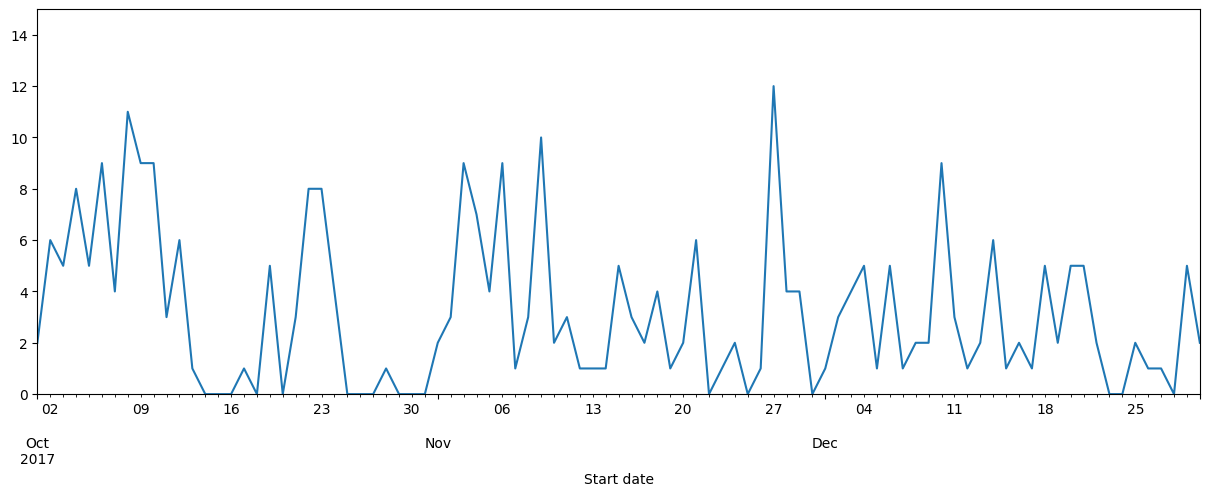

In [46]:
# import matplotlib
import matplotlib.pyplot as plt

# Resample rides to daily, take the size, plot the results
rides.resample('D', on='Start date').size().plot(ylim=[0, 15], figsize=(15, 5))

<Axes: xlabel='Start date'>

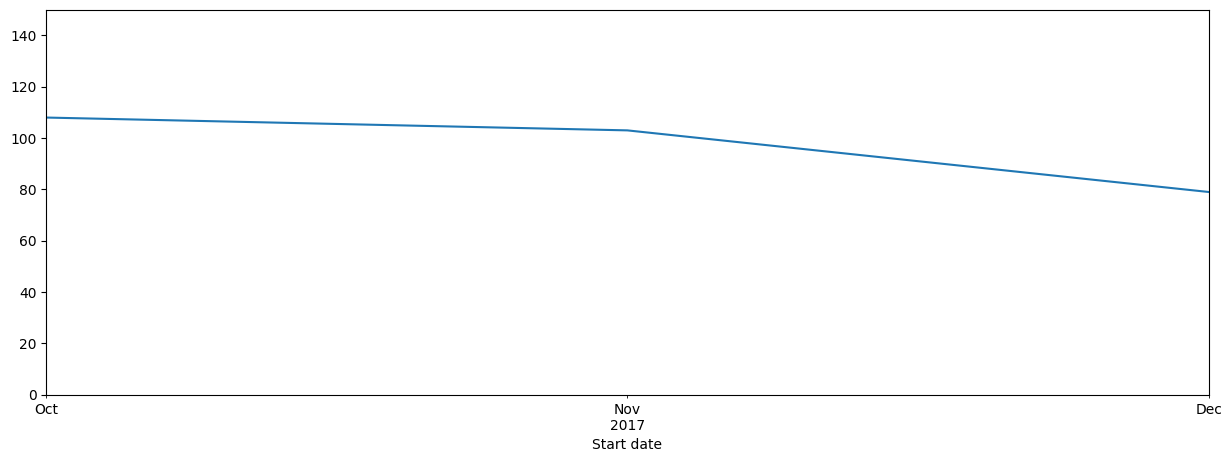

In [47]:
# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date').size().plot(ylim=[0, 150], figsize=(15, 5))

### Members vs casual riders over time

In [48]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on='Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


### Combining groupby() and resample()

In [49]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type').resample('M', on='Start date')

# Print the median duration for each group
print(grouped['Duration'].median())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


## **Additional datetime methods in Pandas**


### Timezones in Pandas


In [50]:
# Localize the Startdate column to Americal/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')

# Print first value
print(rides['Start date'].iloc[0])

2017-10-01 15:23:25-04:00


In [51]:
# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

2017-10-01 20:23:25+01:00


### How long per weekday?

In [52]:
# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.day_name()

# Print the median trip time per weekday
print(rides.groupby('Ride start weekday')['Duration'].median())

Ride start weekday
Friday       684.0
Monday       922.5
Saturday     610.0
Sunday       625.0
Thursday     659.0
Tuesday      644.0
Wednesday    629.0
Name: Duration, dtype: float64


### How long between rides

In [57]:
import pandas as pd
from pytz import timezone

# Sample data
data = {
    'Start date': ['2023-01-01 09:00:00', '2023-01-02 11:30:00', '2023-01-03 14:15:00'],
    'End date': ['2023-01-01 10:00:00', '2023-01-02 12:00:00', '2023-01-03 16:30:00']
}

# Create DataFrame from sample data
rides = pd.DataFrame(data)

# Convert 'Start date' and 'End date' columns to datetime
rides['Start date'] = pd.to_datetime(rides['Start date'])
rides['End date'] = pd.to_datetime(rides['End date'])

# Convert both columns to a specific timezone if needed
timezone_name = 'America/New_York'
rides['Start date'] = rides['Start date'].dt.tz_localize('UTC').dt.tz_convert(timezone_name)
rides['End date'] = rides['End date'].dt.tz_localize('UTC').dt.tz_convert(timezone_name)

# Shift the index of the end date up one; now subtract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on='Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean() / (60 * 60))

Start date
2023-01-31 00:00:00-05:00    25.875
Freq: M, Name: Time since, dtype: float64


#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://mohdfaizy.com/